## _Building Graphs: Input Edges_

In [1]:
import glob, os, sys, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
# append parent dir
# sys.path.append('..')

In [6]:
from src import draw_event
from src import compose_event

### _(+) - Input Data_

In [7]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
input_dir = './data_sets/pandaml/data_0.1_1.5_GeV/'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [8]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

In [9]:
# file_prefixes[:10]

In [10]:
event_id = 1
event_prefix = file_prefixes[event_id]

In [11]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000000001 memory usage 0.03 MB


In [12]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-12.2456,12.120,35.0,9,0,12
1,2,-13.1203,12.625,35.0,9,1,117
2,3,-13.9950,13.130,35.0,9,2,228
3,4,-13.9950,14.140,35.0,9,3,344
4,5,-14.8697,14.645,35.0,9,4,467


In [13]:
hits.layer_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

In [14]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.262386,6000300.0,6.00030,9,0,12,0,0
1,2,0.052152,13722100.0,13.72210,9,1,117,0,0
2,3,0.374347,4073350.0,4.07335,9,2,228,0,0
3,4,0.265922,6590940.0,6.59094,9,3,344,0,0
4,5,0.085074,11615800.0,11.61580,9,4,467,0,0


In [15]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.134669,0.028540,-0.091022,1,25,13,0
1,2,0.0,0.0,0.0,-0.550762,-0.441498,0.780609,1,24,13,0
2,3,0.0,0.0,0.0,-0.072724,0.023378,0.175138,1,30,13,0
3,4,0.0,0.0,0.0,0.936311,-0.311491,-1.019850,1,24,13,0
4,5,0.0,0.0,0.0,-1.049040,-0.440627,0.471787,1,23,13,0


In [16]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-12.4533,11.9370,18.0376,-0.208362,0.236490,0.330727,1.0,10
1,2,-13.0823,12.6579,19.0411,-0.206470,0.238251,0.330621,1.0,10
2,3,-13.7024,13.3791,20.0387,-0.204324,0.239940,0.330703,1.0,10
3,4,-14.1996,13.9682,20.8477,-0.202521,0.241390,0.330725,1.0,10
4,5,-14.8052,14.6980,21.8424,-0.200172,0.243415,0.330639,1.0,10


### _(+) - Build Event_

- functions from _event_utils.py_

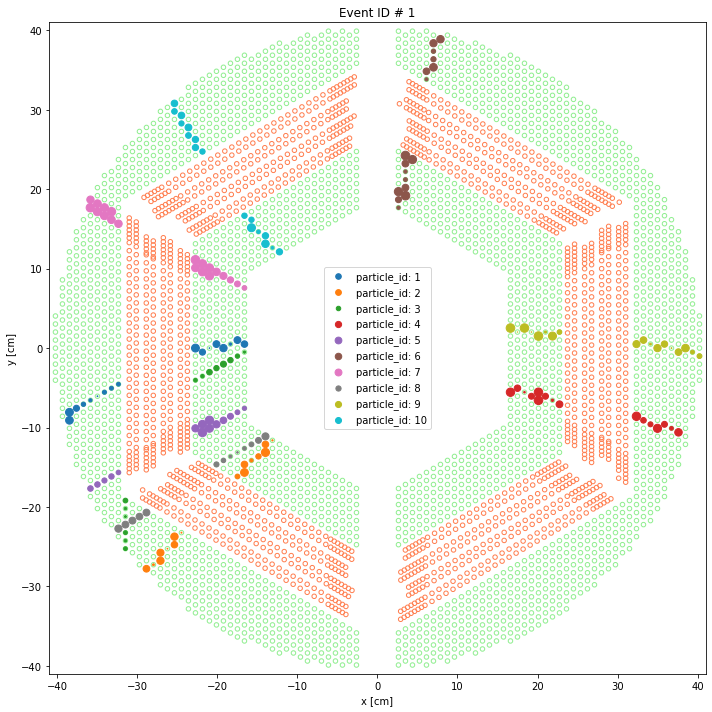

In [17]:
event = compose_event(event_prefix,skewed=False)
draw_event(event,figsize=(10, 10));

In [18]:
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,sector_id,...,tpx,tpy,tpz,weight,particle_id,vx,vy,vz,pt,event_id
0,1,-12.245600,12.120000,35.0,9,0,12,0.262386,0,0,...,-0.208362,0.236490,0.330727,1.0,10,0.0,0.0,0.0,0.315186,1
1,26,16.618999,2.525000,35.0,9,0,81,0.493770,0,4,...,0.260069,0.003329,-0.212996,1.0,9,0.0,0.0,0.0,0.260090,1
2,52,-13.995000,-11.110000,35.0,9,0,39,0.329479,0,2,...,-0.552770,-0.389080,-0.403564,1.0,8,0.0,0.0,0.0,0.675972,1
3,73,-16.618999,7.575000,35.0,9,0,19,0.137127,0,1,...,-0.557918,0.276733,0.846760,1.0,7,0.0,0.0,0.0,0.622779,1
4,102,2.624060,17.674999,35.0,9,0,104,0.073398,0,5,...,0.149280,0.802435,0.664844,1.0,6,0.0,0.0,0.0,0.816202,1


In [19]:
event.layer.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

## _Build Graphs_

### _(A) - True Edges (Layerwise)_

**True Graph** is the ground truth for GNN. It is built from creating edges from _`hits`_ from the same particle but in adjacent layers. 

For this purpose one has _`true_edges, hits = get_layerwise_edges(event)`_ function in the _`event_util.py`_.

In [20]:
from LightningModules.Processing.utils.event_utils import get_layerwise_edges

In [21]:
true_edges, hits = get_layerwise_edges(event)

In [22]:
hits.head()

,index,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,...,tpy,tpz,weight,particle_id,vx,vy,vz,pt,event_id,R
0,0,228,-16.618999,0.505,35.0,9,0,26,0.287147,0,...,-0.017745,-0.082173,1.0,1.0,0.0,0.0,0.0,0.131004,1,38.748497
1,1,174,-16.618999,-0.505,35.0,9,0,27,0.034859,0,...,-0.027409,0.169226,1.0,3.0,0.0,0.0,0.0,0.073948,1,38.748497
2,2,26,16.618999,2.525,35.0,9,0,81,0.493770,0,...,0.003329,-0.212996,1.0,9.0,0.0,0.0,0.0,0.260090,1,38.827396
3,3,1,-12.245600,12.120,35.0,9,0,12,0.262386,0,...,0.236490,0.330727,1.0,10.0,0.0,0.0,0.0,0.315186,1,39.010883
4,4,150,16.618999,-5.555,35.0,9,0,73,0.468096,0,...,-0.265186,-1.012490,1.0,4.0,0.0,0.0,0.0,0.985831,1,39.141399


In [23]:
# lets get unique pids with freq (~ hits).
sel_pids, sel_pids_fr = np.unique(hits.particle_id, return_counts=True)
print(sel_pids)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### _(B) - Input Edges (Layerwise)_

**Input Graph** is the training input to GNN. It is build from edges from hits from all particles but in adjacent layers.

- use same `hits` from `get_layerwise_edges()`
- make `get_input_graph()` function similar to `get_layerwise_edges()`
- add to Data variable.

In [24]:
# layer_groups.size()
# layer_groups.groups
# layer_groups.first()
# layer_groups.last()
# layer_groups.ngroups
# layer_groups.groups.keys()

In [25]:
def select_segments(hits1, hits2, filtering=True):
    
    # TODO: Impelement filtering flag
    # Start with all possible pairs of hits
    keys = ['event_id', 'r', 'phi', 'isochrone', 'sector_id']
    hit_pairs = hits1[keys].reset_index().merge(hits2[keys].reset_index(), on='event_id', suffixes=('_1', '_2'))
    
    if filtering:
        dSector = (hit_pairs['sector_id_1'] - hit_pairs['sector_id_2'])
        sector_mask = ((dSector.abs() < 2) | (dSector.abs() == 5))
        segments = hit_pairs[['index_1', 'index_2']][sector_mask]
    else:
        segments = hit_pairs[['index_1', 'index_2']]
        
    return segments

def construct_graph(hits, layer_pairs, filtering=True):
    """Construct one graph (e.g. from one event)"""

    # Loop over layer pairs and construct segments
    layer_groups = hits.groupby('layer')
    segments = []
    for (layer1, layer2) in layer_pairs:
        
        # Find and join all hit pairs
        try:
            hits1 = layer_groups.get_group(layer1)
            hits2 = layer_groups.get_group(layer2)
        # If an event has no hits on a layer, we get a KeyError.
        # In that case we just skip to the next layer pair
        except KeyError as e:
            logging.info('skipping empty layer: %s' % e)
            continue
        
        # Construct the segments
        segments.append(select_segments(hits1, hits2, filtering))
    
    # Combine segments from all layer pairs
    # segments = pd.concat(segments)
    return segments

In [26]:
# get number of layers, without skewed layers its just 18
n_layers = hits.layer.unique().shape[0]
print("total number of layers (w/o skewed): {}".format(n_layers))

total number of layers (w/o skewed): 18


In [27]:
# lets get pairs to adjacent layers
layers = np.arange(n_layers)
layer_pairs = np.stack([layers[:-1], layers[1:]], axis=1)
layer_pairs

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16],
       [16, 17]])

In [28]:
# returns a list of indices from layer pairs.
segments = construct_graph(hits, layer_pairs, filtering=True)

In [29]:
# Combine segments from all layer pairs
# segments = pd.concat(segments)
# segments.describe()

In [30]:
# let's see the first layer pair (0th element)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(segments[0][["index_1", "index_2"]])

In [31]:
# get the layer pari [0,1] from segments
edge_index = segments[0].to_numpy().T

In [32]:
edge_index.shape

(2, 56)

In [33]:
edge_index[0]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  7,  7,  7,  7,  7,  7,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 10, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14])

In [34]:
edge_index[1]

array([ 5,  6, 12, 17, 20, 25, 26,  5,  6, 12, 17, 20, 25, 26,  8, 11, 19,
        5,  6, 12, 19, 25, 26,  8, 11, 19,  5,  6, 17, 20, 25, 26,  8, 11,
       12, 19,  5,  6, 17, 20, 25, 26,  5,  6, 12, 17, 20, 25, 26,  5,  6,
       12, 17, 20, 25, 26])

In [35]:
# hits.query("layer==0")

In [36]:
# hits.query("layer==1")

In [37]:
edge_index.shape[1] == len(segments[0])

True

### _(+) - Plotting Input Edges_

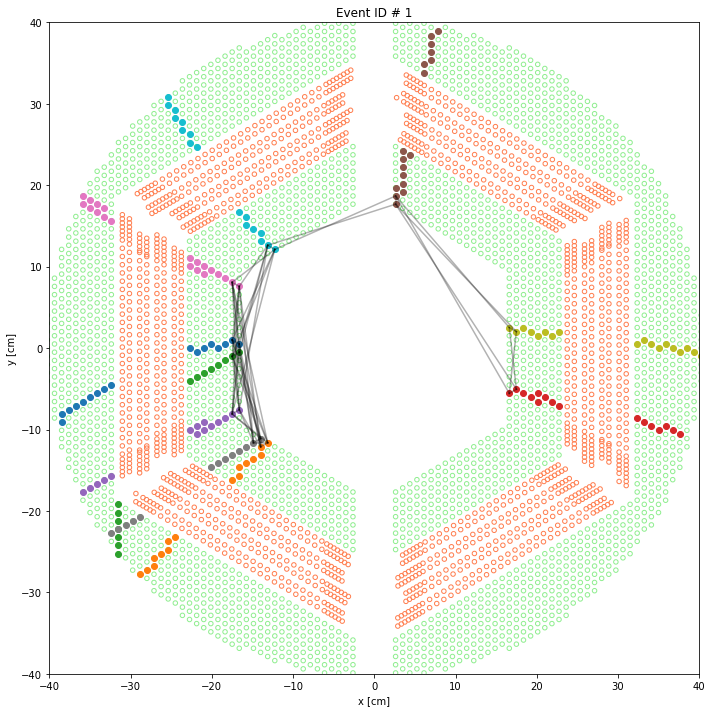

In [38]:
# plotting input_edges
plt.close('all')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

p_ids = np.unique(event.particle_id.values)
det = pd.read_csv("src/stt.csv")
skw = det.query('skewed==0')
nkw = det.query('skewed==1') # one may look for +ve/-ve polarity
    
# detector layout
plt.scatter(skw.x.values, skw.y.values, s=20, facecolors='none', edgecolors='lightgreen')
plt.scatter(nkw.x.values, nkw.y.values, s=20, facecolors='none', edgecolors='coral')

# particle tracks
for pid in sel_pids:
    idx = hits.particle_id == pid
    ax.scatter(hits[idx].x.values, hits[idx].y.values, label='particle_id: %d' %pid)
    
# input edges
for iedge in range(edge_index.shape[1]):
#for iedge in range(7):
    pt1 = hits.iloc[edge_index[0][iedge]]
    pt2 = hits.iloc[edge_index[1][iedge]]
    ax.plot([pt1.x, pt2.x], [pt1.y, pt2.y], color='k', alpha=0.3, lw=1.5)

ax.set_title('Event ID # %d' % event_id)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.grid(False)
# ax.legend(fontsize=10, loc='best')
fig.tight_layout()
fig.savefig("input_edges.png")

### _(+) Sector-wise Filtering_

* build edges only in neighouring sectors _i.e._ `|sector_id_i - sector_id_j| < 2`

In [39]:
# lets take first layer_pair and corresponding hits
layer_pairs[0]

array([0, 1])

In [40]:
layer_groups = hits.groupby('layer')

In [41]:
hits1 = layer_groups.get_group(0)
hits2 = layer_groups.get_group(1)

In [42]:
keys = ['event_id', 'r', 'phi', 'isochrone', 'sector_id']
hit_pairs = hits1[keys].reset_index().merge(hits2[keys].reset_index(), on='event_id', suffixes=('_1', '_2'))
hit_pairs

,index_1,event_id,r_1,phi_1,isochrone_1,sector_id_1,index_2,r_2,phi_2,isochrone_2,sector_id_2
0,0,1,16.626671,3.111215,0.287147,1,5,17.522833,3.083922,0.314531,1
1,0,1,16.626671,3.111215,0.287147,1,6,17.522833,-3.083922,0.116267,1
2,0,1,16.626671,3.111215,0.287147,1,8,17.609940,0.114961,0.001477,4
3,0,1,16.626671,3.111215,0.287147,1,11,18.208021,-0.281035,0.279700,4
4,0,1,16.626671,3.111215,0.287147,1,12,18.208044,2.375431,0.052152,0
...,...,...,...,...,...,...,...,...,...,...,...
95,14,1,18.263947,-2.713923,0.112674,1,17,18.513628,-2.427869,0.286235,2
96,14,1,18.263947,-2.713923,0.112674,1,19,18.868357,1.431272,0.242910,5
97,14,1,18.263947,-2.713923,0.112674,1,20,18.868391,-2.478471,0.229737,2
98,14,1,18.263947,-2.713923,0.112674,1,25,19.269560,2.708903,0.226689,1


In [43]:
sector_mask = ((hit_pairs['sector_id_1'] - hit_pairs['sector_id_2']).abs() < 2)

In [44]:
sector_mask

0      True
1      True
2     False
3     False
4      True
      ...  
95     True
96    False
97     True
98     True
99     True
Length: 100, dtype: bool

In [45]:
hit_pairs[['index_1', 'index_2']].head()

,index_1,index_2
0,0,5
1,0,6
2,0,8
3,0,11
4,0,12


In [46]:
hit_pairs[['index_1', 'index_2']][sector_mask].head()

,index_1,index_2
0,0,5
1,0,6
4,0,12
5,0,17
7,0,20
